## Linear Regression

* Quick-and-dirty baseline for regression tasks
* Pros
    * Extremely fast
    * Easily interpretable (you see the coefficients)
* Cons
    * Assumes linear relationship
    * May underfit
    
* Note: Can model non-linear relationships with Polonomial Basis Functions
* https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data

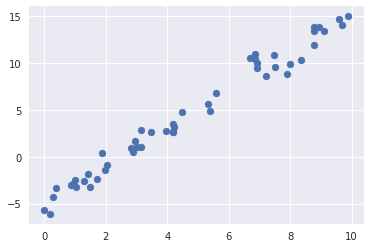

In [20]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

### Simple Regression

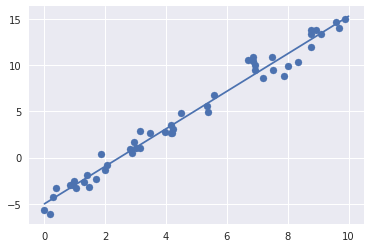

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [22]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


### Multivariate Regression

In [23]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print("Intercept", model.intercept_)
print("Coefficients", model.coef_)

Intercept 0.500000000000012
Coefficients [ 1.5 -2.   1. ]


### Polynomial Basis Functions

* Transform the data with basis functions to model non-linear relationships
* Transform 1D features --> 3D features by taking the exponent

It looks like we take a flat 1D feature vector (single linear equations), and turn it into a non-linear system of equations by Squaring the inputs and adding new dimensions


In [24]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [25]:
# Make a pipeline
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

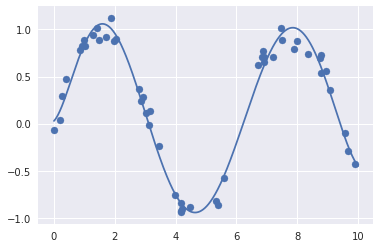

In [26]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Gaussian Basis Functions

* Expand the dimensions of the 1D feature with sum of Gaussians

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.06-gaussian-basis.png)

In [29]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

### Ridge Regression (L2)

* Weight Decay
* Penalizes sum of squares
* Penalizing large values of the model parameters
* alpha hyperparameter controls strength of penalty

/home/bfortuner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


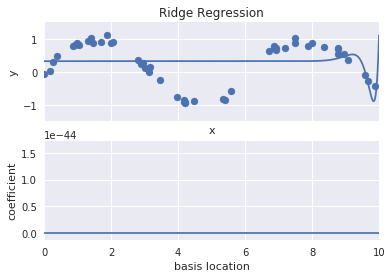

In [30]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(50), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### Lasso Regression (L1)

* Weight Decay
* Penalize sum of absolute values

Difference from Ridge Regression?
* Favors sparse models: tries to set model coefficients to zero
* It's like dropout (or Relu when weights die)

/home/bfortuner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


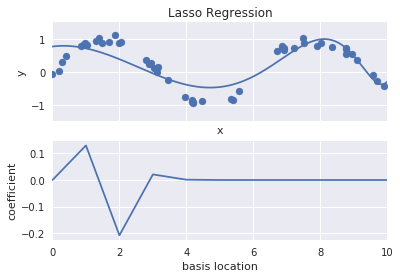

In [31]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')